# Teste de Sistema de Detecção de Fraudes

Teste utilizando o OneClassSVM, que é uma implementação de Support Vector Machine para Unsupervised Learning

Nessa versão o teste é bem simples, utiliza só duas features e não faz tantos testes de configuração da SVM. Quero fazer uma outra versão pra comparar SVM, Logistic Regression e Neural Network. Al[em disso, usar GridSearch para teste de parâmetros etc

**Segunda Versão** Vou tentar usar o GridSearch para definir parâmetros


In [157]:
from sklearn import svm
import numpy as np
from sklearn import preprocessing





- Features layout: cod.cidade, valor compra
  - cod. cidade = 1 sp, 2 jundiai, 3 campinas, 4 sorocaba, 5 internet
  - local: 1 shoppping, 2 posto gasolina, 3 feira livre, 4 restaurante


** Create a list for training using a random number generator **



In [158]:
import random

place  = np.random.randint(1,4,150)
price  = np.random.uniform(50.0,200,150)

X = np.column_stack((place,price))

print X.shape
print X[:,0].shape
print X


test_place  = np.random.randint(1,8,100)
test_price  = np.random.uniform(50.0,200,100)

X_test = np.ones((100,2))

X_test[:,0] = test_place.reshape(100,)
X_test[:,1] = test_price.reshape(100,)

#print X_test


(150, 2)
(150,)
[[   1.          138.93034022]
 [   1.          149.38291911]
 [   2.          118.8628211 ]
 [   1.          196.45010447]
 [   2.          197.68551628]
 [   3.           76.44694425]
 [   1.          128.54485806]
 [   3.          174.22685272]
 [   2.          166.17955772]
 [   2.           87.84809596]
 [   2.          148.94740242]
 [   3.           94.7425958 ]
 [   1.           54.08103818]
 [   3.          163.57306945]
 [   3.          163.9697747 ]
 [   2.          127.83887168]
 [   2.          164.70429466]
 [   2.           79.03411695]
 [   3.           86.76699513]
 [   2.          138.80970342]
 [   3.           97.25634998]
 [   3.          129.14199199]
 [   1.           67.53516506]
 [   3.           58.90328373]
 [   3.           61.36528964]
 [   1.           93.08104362]
 [   2.          133.17925303]
 [   2.           90.68356199]
 [   3.          106.50483037]
 [   1.          188.19911903]
 [   1.          103.39955781]
 [   1.          124.10

### ** Normalize data for SVM training **

This is a ** very ** important step, specially because the features are in a very different range

** Nota: ** o Objeto standard, criado aqui, será utilizado abaixo, nos testes, para normalizar os dados de testes baseados nos parametros de normalização usados aqui no treinamento

In [159]:

standard = preprocessing.StandardScaler().fit(X)
df_std = standard.transform(X)
X = df_std

print type(df_std)
print df_std.shape
#print X


df_std_test = standard.transform(X_test)
X_test = df_std_test
#print X_test

<type 'numpy.ndarray'>
(150, 2)


## Usando o GridSearchCV para a escolha dos Parâmetros gamma e nu

Para escolher o resultado, olhar o gráfico e os indices impressos abaixo. Note que a cada vez que rodamos o script, os dados são gerados novamente (random) por isso não dá pra usar sempre o melhor valor que aparece aqui. Se os valores fossem fixos, ou reais, seria possível fazer o uso.

idnex: 0  gamma: 0.100000  nu: 0.100000  mean: 0.886667
idnex: 1  gamma: 0.100000  nu: 0.200000  mean: 0.793333
idnex: 2  gamma: 0.100000  nu: 0.300000  mean: 0.700000
idnex: 3  gamma: 0.100000  nu: 0.400000  mean: 0.593333
idnex: 4  gamma: 0.100000  nu: 0.500000  mean: 0.500000
idnex: 5  gamma: 0.100000  nu: 0.600000  mean: 0.406667
idnex: 6  gamma: 0.100000  nu: 0.700000  mean: 0.300000
idnex: 7  gamma: 0.100000  nu: 0.800000  mean: 0.193333
idnex: 8  gamma: 0.100000  nu: 0.900000  mean: 0.100000
idnex: 9  gamma: 0.200000  nu: 0.100000  mean: 0.886667
idnex: 10  gamma: 0.200000  nu: 0.200000  mean: 0.773333
idnex: 11  gamma: 0.200000  nu: 0.300000  mean: 0.693333
idnex: 12  gamma: 0.200000  nu: 0.400000  mean: 0.580000
idnex: 13  gamma: 0.200000  nu: 0.500000  mean: 0.493333
idnex: 14  gamma: 0.200000  nu: 0.600000  mean: 0.393333
idnex: 15  gamma: 0.200000  nu: 0.700000  mean: 0.300000
idnex: 16  gamma: 0.200000  nu: 0.800000  mean: 0.193333
idnex: 17  gamma: 0.200000  nu: 0.900000 

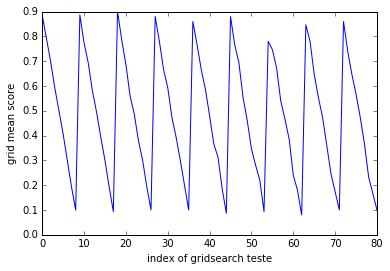

In [160]:

from sklearn.grid_search import GridSearchCV

gamma_range = np.linspace (0.1,0.9,9)
nu_range   = np.linspace (0.1,0.9,9)
param_grid = dict (gamma=gamma_range,nu=nu_range)

#print param_grid
                   

grid = GridSearchCV(clsf,param_grid,cv=10,scoring='accuracy')


y = np.ones((150,1))
#print y
grid.fit(X,y)

#print "decision function"
#clsf.decision_function(X)

for index,res in enumerate(grid.grid_scores_):
    print "idnex: %d  gamma: %f  nu: %f  mean: %f" % (index,res.parameters['gamma'],res.parameters['nu'],res.mean_validation_score)

grid_mean_scores = [result.mean_validation_score for result in grid.grid_scores_]

import matplotlib.pyplot as plt
%matplotlib inline


plt.plot (grid_mean_scores)
plt.xlabel('index of gridsearch teste')
plt.ylabel('grid mean score')
plt.show()




In [161]:
# usando valores padrões de gamma e nu
clsf = svm.OneClassSVM(nu=0.1,kernel='rbf',gamma=0.1)
clsf.fit(X)

output = clsf.predict (X)


print "Corretos: %d " % len(output[output == 1])
print "Fraude: %d " % len(output[output == -1])




Corretos: 136 
Fraude: 14 


## Usando o X_test para fazer o predict

agora, o X_test contém uma quantidade grande de valores que deveriam ser considerados FRAUDE

In [162]:
output = clsf.predict (X_test)


print "Corretos: %d " % len(output[output == 1])
print "Fraude: %d " % len(output[output == -1])



Corretos: 34 
Fraude: 66 
